In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

Funcões auxiliares

In [16]:
from math import pi,cos,sin

### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)

def move (dx,dy,dz):
    T = np.eye(4)
    T[0,-1] = dx
    T[1,-1] = dy
    T[2,-1] = dz
    return T



def z_rotation(angle):
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix


def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_title("camera referecnce")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)


    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis



Criação da câmera e referencial do mundo

Considere uma câmera representada pelos eixos coordenados abaixo. Note que a câmera está alinhada com o referencial do mundo e o eixo Z, o qual representa o eixo óptico da câmera, está apontado para cima.

In [17]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
point =np.array([[0],[0],[0],[1]])

cam = np.hstack((base,point))

print ('Origin: \n',point)

print ('cam: \n',cam)

Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin: 
 [[0]
 [0]
 [0]
 [1]]
cam: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [18]:
ax0 = set_plot()
draw_arrows(point,base,ax0)
draw_arrows(cam[:,-1],cam[:,0:3],ax0,0.5)

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

Agora vamos incluir um objeto na cena. Vamos usar a casa que já apresentamos no material das aulas de python.

In [19]:
#Creating a house

house = np.array([[0,         0,         0],
         [0,  -10.0000,         0],
         [0, -10.0000,   12.0000],
         [0,  -10.4000,   11.5000],
         [0,   -5.0000,   16.0000],
         [0,         0,   12.0000],
         [0,    0.5000,   11.4000],
         [0,         0,   12.0000],
         [0,         0,         0],
  [-12.0000,         0,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,  -10.0000,         0],
         [0,  -10.0000,         0],
         [0,  -10.0000,   12.0000],
[-12.0000,  -10.0000,   12.0000],
  [-12.0000,         0,   12.0000],
         [0,         0,   12.0000],
         [0,  -10.0000,   12.0000],
         [0,  -10.5000,   11.4000],
  [-12.0000,  -10.5000,   11.4000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
         [0,   -5.0000,   16.0000],
         [0,    0.5000,   11.4000],
  [-12.0000,    0.5000,   11.4000],
  [-12.0000,         0,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,         0,         0],
  [-12.0000,         0,   12.0000],
  [-12.0000,         0,         0]])

house = np.transpose(house)

#add a vector of ones to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, np.ones(np.size(house,1))])

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo

draw_arrows(cam[:,-1],cam[:,0:3],ax0)
draw_arrows(point,base,ax0,1.5)

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

Vamos posicionar a câmera com o eixo Z apontando para a casa e a uma distância de 10 unidades da casa.

Tomando o sistema de coordenadas do mundo como referencial, vamos transformar o objeto câmera da seguinte forma:

1- Rotacionar a câmera de -90 graus em torno do eixo X

2- Rotacionar a câmera de 90 graus em torno do eixo Z

3- Transladar a câmera para posicioná-la no ponto (15,-5,6).

In [20]:
cam_0 = cam

Rx = x_rotation(-pi/2)
Rz = z_rotation(pi/2)
T = move(20,-5,6)
M = np.dot(np.dot(T,Rz),Rx)
cam  = np.dot(M,cam)

print ('cam_0: \n',cam_0)
print ('cam: \n',cam)

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo

draw_arrows(cam[:,-1],cam[:,0:3],ax0)

cam_0: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
cam: 
 [[ 0. -0. -1. 20.]
 [ 1.  0.  0. -5.]
 [ 0. -1.  0.  6.]
 [ 0.  0.  0.  1.]]


<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

Considere agora que a câmera tem como parâmetros intrínsecos:

1- Distância focal igual a 50mm

2- CCD de tamanho 36 x 24 mm que gera uma imagem de 1280 x 720 pixels

3- Sem cisalhamento

Construa a matriz de parâmetros intrínsecos.
Faça seu código abaixo.

In [21]:
f = 50
print(f"Distância Focal:{f}")

Distância Focal:50


In [22]:
sx = 1280/36
sy = 720/24
print(f"Escalas sx:{sx}, sy:{sy}")

Escalas sx:35.55555555555556, sy:30.0


In [23]:
ox = 1280/2
oy = 720/2
print(f"Ponto principal :({ox},{oy})")

Ponto principal :(640.0,360.0)


In [24]:
K = np.array([[f*sx,0,ox],[0,f*sy,oy],[0,0,1]])
print(f"Matriz de Parâmetros extrisicos da câmera:\n{K}")

Matriz de Parâmetros extrisicos da câmera:
[[1777.778    0.     640.   ]
 [   0.    1500.     360.   ]
 [   0.       0.       1.   ]]


Baseado nas rotações e translação feitas para posicionamento da câmera, defina a matriz de parâmetros extrínsecos.

Faça o código aqui.

In [25]:
G = np.linalg.inv(M)#Matriz que leva do mundo para camera
print(cam)
print(M)
print(G)

[[ 0. -0. -1. 20.]
 [ 1.  0.  0. -5.]
 [ 0. -1.  0.  6.]
 [ 0.  0.  0.  1.]]
[[ 0. -0. -1. 20.]
 [ 1.  0.  0. -5.]
 [ 0. -1.  0.  6.]
 [ 0.  0.  0.  1.]]
[[ 0.  1.  0.  5.]
 [-0.  0. -1.  6.]
 [-1.  0.  0. 20.]
 [ 0.  0.  0.  1.]]


Agora que você já possui as matrizes de parâmetros instrínsecos e extrínsecos, defina a matriz completa de projeção perspectiva.

Depois use essa matriz para projetar a casa no plano da imagem. Você fará isso realizando os seguintes passos:

1- Multiplique a matriz de projeção pelo objeto a ser projetado. Este objeto deve estar representado em coordenadas homogêneas, no formato de uma matriz, onde cada ponto do objeto está representado em uma coluna.

2- Depois de projetado, os pontos do objeto estarão na forma (kx, ky, k). Então para obter as coordenadas cartesianas de cada ponto projetado, você deverá realizar a divisão das suas duas primeiras coordenadas pela terceira para obter (x,y,1).

3- Gere a imagem 2D, plotando os pontos projetados.

4- Fique atento para o fato de que a origem da imagem está no canto superior esquerdo e que o eixo X e eixo Y aumentam da esquerda para a direita e de cima para baixo, respectivamente.

Se achar mais interessante, monte uma função para realizar a projeção.

Faça seu código abaixo. Há algumas dicas para te ajudar.

[[ -640.     1777.778     0.    21688.889]
 [ -360.        0.    -1500.    16200.   ]
 [   -1.        0.        0.       20.   ]]
[[21688.889  3911.111  3911.111  3200.    12800.    21688.889 22577.778
  21688.889 21688.889 29368.889 20480.    11591.111  3911.111  3911.111
  11591.111 29368.889 21688.889  3911.111  3022.222 10702.222 11591.111
  20480.    12800.    22577.778 30257.778 29368.889 20480.    11591.111
  11591.111 20480.    29368.889 29368.889 29368.889]
 [16200.    16200.    -1800.    -1050.    -7800.    -1800.     -900.
  -1800.    16200.    20520.    20520.    20520.    16200.    -1800.
   2520.     2520.    -1800.    -1800.     -900.     3420.     2520.
  -3480.    -7800.     -900.     3420.     2520.    -3480.     2520.
  20520.    20520.    20520.     2520.    20520.   ]
 [   20.       20.       20.       20.       20.       20.       20.
     20.       20.       32.       32.       32.       20.       20.
     32.       32.       20.       20.       20.       32.    

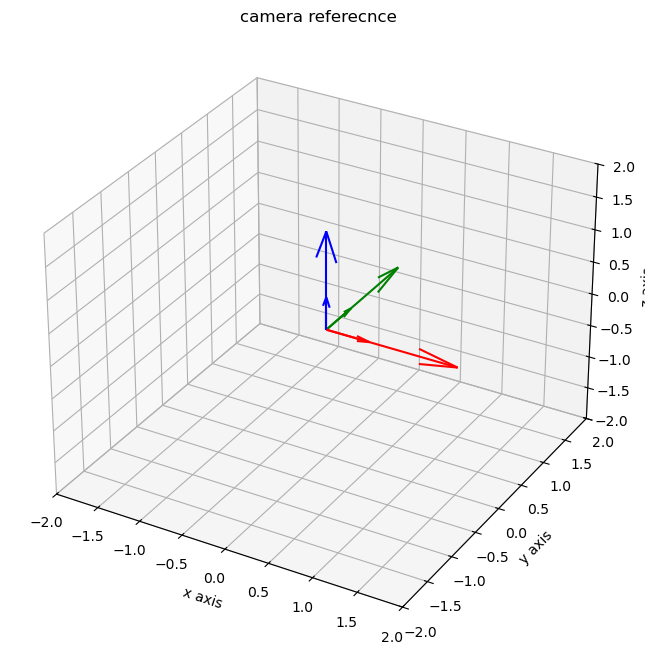

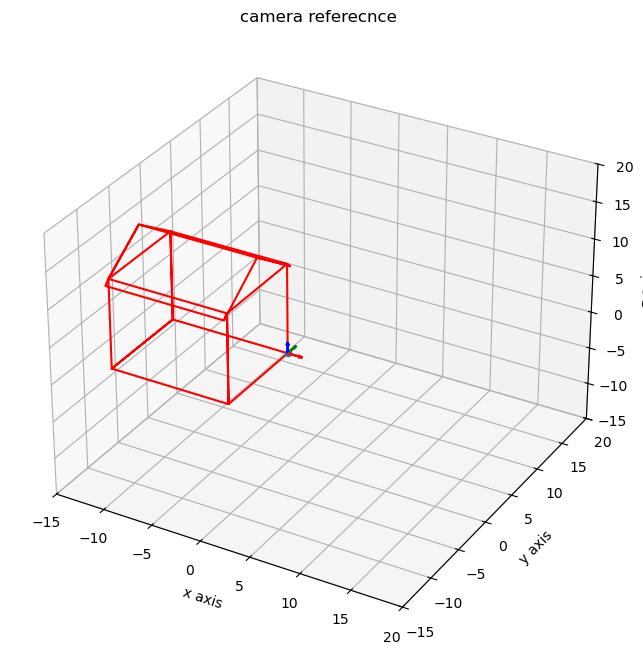

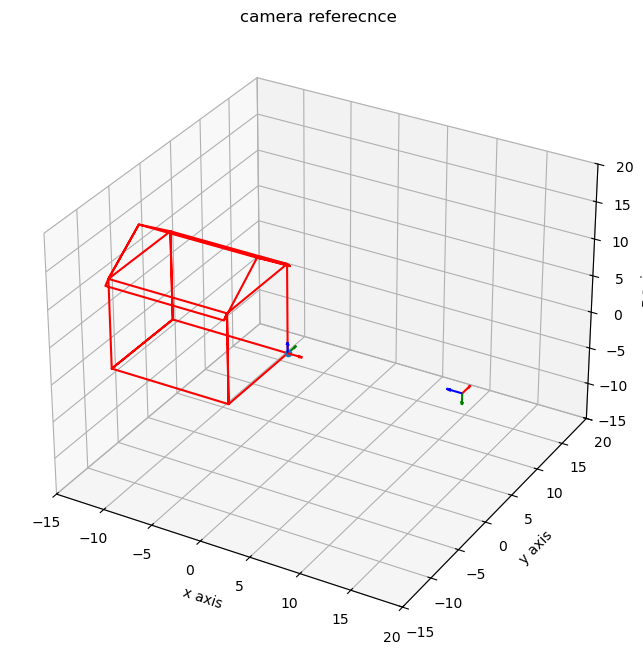

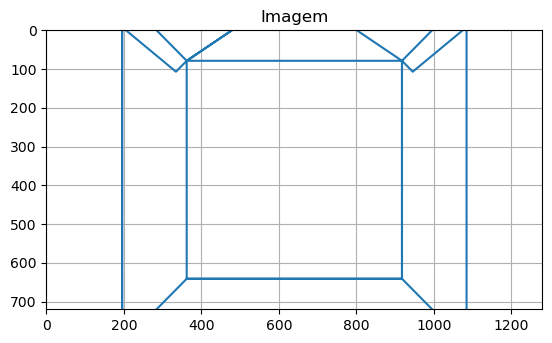

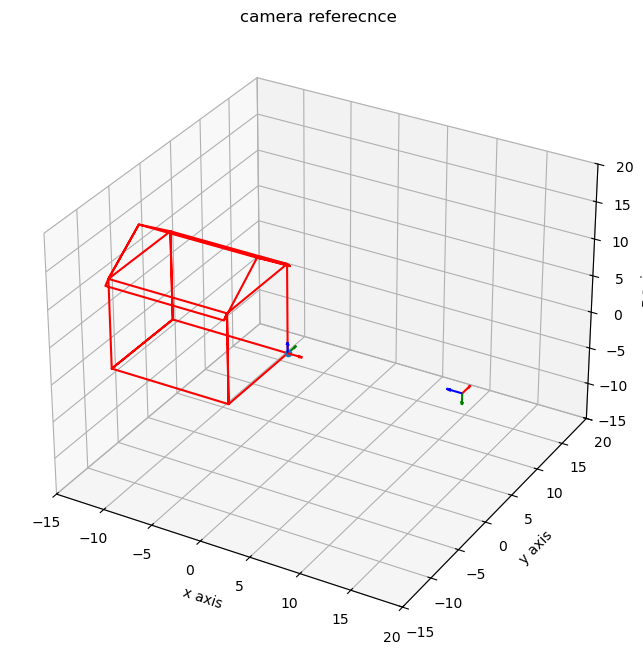

In [26]:
# Matriz de projeção
P_can = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])

# Projeção e criação da imagem
Mproj = K@P_can@G
print(Mproj)

# Preparação das coordenadas na forma cartesiana
p_img = Mproj@house
print(p_img)
# Plota a imagem
p_img = p_img/p_img[2]
print(p_img)
fig = plt.figure()
ax1 = plt.axes()
ax1.set_title("Imagem")
# Acerte os limites do eixo X
ax1.set_xlim([0,1280])
# Acerte os limites do eixo Y
# Para inverter, basta colocar o valor máximo primeiro e o valor mínimo depois
#ax1.set_ylim([0,720])#Invetido deve ser ja que a origem e o canto superior esquerdo
ax1.set_ylim([720,0])
# Acerte os parâmetros de entrada da função plot para desenhar a imagem da casa
ax1.plot(p_img[0,:],p_img[1,:])

ax1.grid('True')
ax1.set_aspect('equal')

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo

draw_arrows(cam[:,-1],cam[:,0:3],ax0)

plt.show()

